# ~ Project 1 ~
# Exploring Weather Trends Global vs Los Angeles and Munich

## Analysis report by Audrey Tan
 ___
 
## Overview of steps taken to complete the project
### 1. Data Extraction 
I extracted the data from the SQL database provided with the following SQL statement to join city_data and global_data and get the average temperatures of my nearest city (Los Angeles), favorite city (Munich) and average global temperatures. 

> 
```
select a.year, a.c_temp as ltemp, 
       b.c_temp as mtemp, a.ga_temp as gtemp 
from (select c.year, c.avg_temp as c_temp, 
      g.avg_temp as ga_temp 
      from city_data c, global_data g 
      where  c.year = g.year 
      and c.country ='United States' 
      and c.city ='Los Angeles')a, 
      (select c.year, c.avg_temp as c_temp, 
       g.avg_temp as ga_temp 
       from city_data c, global_data g 
       where  c.year = g.year 
       and c.country ='Germany' 
       and c.city ='Munich')b 
where a.year=b.year 
and a.ga_temp = b.ga_temp
```


### 2. Data Preparation
I stored the query results to a CSV file, and open it with a jupyter notebook to calculate a 8-year moving average on the local and global temperatures. This is to smooth out small abrupt change of trends.

The moving 8-year average is calculated by summing the average temperatures of each of the past 8 years, and divided by 8. I read the CSV file into a a pandas DataFrame, then called the Pandas `dataframe.rolling().mean()` method to calculate the moving 8-year average. I stored the results in a dataframe with year as the index column, then removed any *NaN* values from it.

### 3. Line Chart Creation
I used matplotlib to plot a line chart graph to show global and local moving average temperature trends. 

### 4. Make Observations
I looked at the line chart to note down some observations on the trends between global and local moving averages

## Data Preparation

> read in CSV file and pre-view the first 10 rows

In [1]:
# Import pandas and matplotlib 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in csv file and print the first 10 rows
df = pd.read_csv('./la_mu_global_data.csv')
df[:10]

,year,ltemp,mtemp,gtemp
0,1849,15.71,4.37,7.98
1,1850,15.28,3.84,7.90
2,1851,15.53,3.66,8.18
3,1852,15.61,5.02,8.10
4,1853,16.27,3.69,8.04
5,1854,15.74,4.08,8.21
6,1855,15.94,3.52,8.11
7,1856,15.52,4.30,8.00
8,1857,16.19,4.41,7.76
9,1858,15.67,3.63,8.10


## Calculate 8-year moving average temperatures
> call `dataFrame.rolling().mean()` on city and global temperature columns
>
> pre-preview the first 10 columns

In [3]:
# calculate rolling mean using a 8-year window, print first 10 rows
rolling_mean = df.drop('year', axis=1).rolling(9).mean()
rolling_mean[:10]

,ltemp,mtemp,gtemp
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,15.754444,4.098889,8.031111
9,15.750000,4.016667,8.044444


## Prepare data frame for line chart printing
> construct a dataFrame with year, city and gloab rolling mean columns
>
> drop rows with `NaN` values
> 
> set year as the index column

In [4]:
# concatenate year and rolling_mean columns, print first 10 rows
cg_df = pd.concat([df['year'],rolling_mean], axis=1)
cg_df[:10]

,year,ltemp,mtemp,gtemp
0,1849,NaN,NaN,NaN
1,1850,NaN,NaN,NaN
2,1851,NaN,NaN,NaN
3,1852,NaN,NaN,NaN
4,1853,NaN,NaN,NaN
5,1854,NaN,NaN,NaN
6,1855,NaN,NaN,NaN
7,1856,NaN,NaN,NaN
8,1857,15.754444,4.098889,8.031111
9,1858,15.750000,4.016667,8.044444


In [5]:
# drop rows with NaN, print first 10 rows
cg_df.dropna(axis=0, inplace=True)
cg_df[:10]

,year,ltemp,mtemp,gtemp
8,1857,15.754444,4.098889,8.031111
9,1858,15.750000,4.016667,8.044444
10,1859,15.751111,4.153333,8.083333
11,1860,15.737778,4.125556,8.058889
12,1861,15.837778,4.081111,8.031111
13,1862,15.813333,4.270000,7.977778
14,1863,15.828889,4.411111,7.966667
15,1864,15.904444,4.382222,7.952222
16,1865,15.945556,4.432222,7.972222
17,1866,15.961111,4.498889,8.031111


In [6]:
# set year column as the index column, print first 10 rows
cgdf = cg_df.set_index('year')
cgdf[:10]

,ltemp,mtemp,gtemp
year,,,
1857,15.754444,4.098889,8.031111
1858,15.750000,4.016667,8.044444
1859,15.751111,4.153333,8.083333
1860,15.737778,4.125556,8.058889
1861,15.837778,4.081111,8.031111
1862,15.813333,4.270000,7.977778
1863,15.828889,4.411111,7.966667
1864,15.904444,4.382222,7.952222
1865,15.945556,4.432222,7.972222


## Print Line Chart to compare local and global weather trend

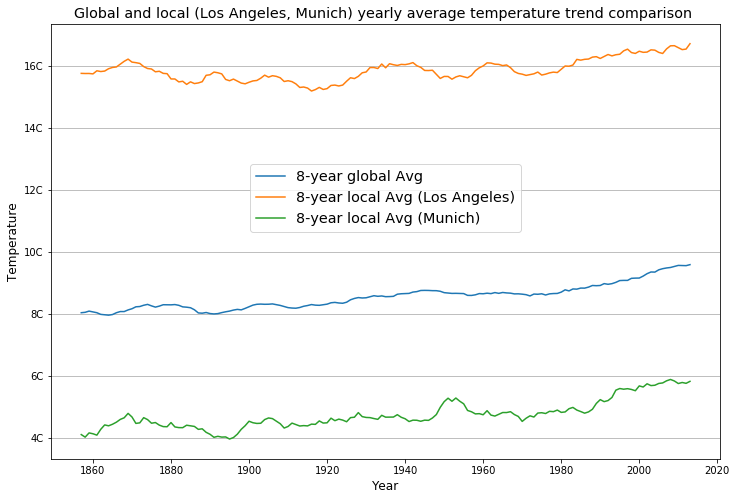

In [7]:
# Produce a line chart
plt.figure(figsize=(12,8))
plt.plot(cgdf['gtemp'])
plt.plot(cgdf['ltemp'])
plt.plot(cgdf['mtemp'])
plt.legend(['8-year global Avg','8-year local Avg (Los Angeles)', '8-year local Avg (Munich)'],loc='center',bbox_to_anchor=(0.5, 0.6),fontsize='x-large')
plt.title('Global and local (Los Angeles, Munich) yearly average temperature trend comparison ',fontsize='x-large')
plt.xlabel('Year',fontsize='large')
plt.ylabel('Temperature',fontsize='large')
plt.yticks([4,6,8,10,12,14,16],['4C','6C','8C','10C','12C','14C','16C'])
plt.grid(b=True, axis='y')
plt.show()


## Weather Trend Observations

### The chart shows the 8-year moving average temperatures of global and Los Angeles, Munich from year 1857 to 2013 where global and local (Los Angeles, Munich) datasets intersect in the time range intervals, and temperature data from either datasets are present. 

### Observations
#### The following trends are observed:
* The temparatures for global, Los Angeles and Munich are trending upward generally, although Los Angeles has much more pronounced fluctuations than Munich and global's in the time range intervals. The smoother global moving average data is likely due to global data was taken from the average of many major cities around the world, whereas data for Los Angeles and Munich came from a single city only.


* Los Angeles is much warmer on average compared to Munich and global averages, with temperatures consistently roughly double and quadruple that of global and Munich, respectively. 


* Between 1860 and 1960 Los Angeles had many sharp rises and drops in temperatures, with pronounced sharp drops below 16C between 1872 and 1931. Whereas global temperatures were steady with gentle rises and drops, and Munich temperatures with noticeable rises and drops than global's. Interestingly, the fluctuations for global and Munich are  all above 8C and 4C respectively in the same period.


* Since 1981 Los Angeles (above 16C) and Munich (above 4C) temperatures have been on the rise, mirroring that of global (above 8C). Los Angeles's rise above 16C is a little gentler (in 16.08C to 16.77C range) than Global's above 8C (in 8.79C to 9.57C range). Munich's rise above 4C is the most pronounced of all (in 4.86 to 5.92 range). Between 1981 and 1995, Munich had significant rise in temperatures from 4.86C to 5.70C. 
